# Simple regression with TensorFlow

Progressive example working through various network set ups

https://towardsdatascience.com/training-neural-networks-for-price-prediction-with-tensorflow-8aafe0c55198

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.1


In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [27]:
dat = pd.read_csv("./rbfs/phi_short_reduce.csv")
dat.head()

/var/folders/ws/m03sh3xd4ns621mckfrht3r0000_08/T/ipykernel_83987/2538642985.py:1: DtypeWarning: Columns (204) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv("./rbfs/phi_short_reduce.csv")


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,194,195,196,197,198,199,200,y,site,date
0,0,1.000000,0.962154,0.856997,0.706648,0.539408,0.381171,0.249352,0.151007,0.084658,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014,2005.0,2023-01-01
1,1,0.999994,0.963078,0.858649,0.708695,0.541492,0.383014,0.250800,0.152030,0.085314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007,2005.0,2023-01-01
2,2,0.999976,0.963992,0.860293,0.710738,0.543578,0.384861,0.252253,0.153059,0.085974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,2005.0,2023-01-01
3,3,0.999946,0.964894,0.861931,0.712779,0.545666,0.386713,0.253711,0.154092,0.086639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009,2005.0,2023-01-01
4,4,0.999903,0.965785,0.863561,0.714817,0.547755,0.388568,0.255175,0.155131,0.087307,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011,2005.0,2023-01-01


In [28]:
X = dat.iloc[:, 1:202].to_numpy()
y = dat['y'].to_numpy()

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8, random_state=42)

## TensorFlow

In [30]:
# Set random seed
tf.random.set_seed(42)
from keras import Sequential
from keras import models
from keras import layers

In [31]:
n_feat = X_train.shape[1]

### Model 1 (Simple TF regression)

In [32]:
model = models.Sequential([
  layers.Dense(512, activation='relu', input_shape=(n_feat,)),
  layers.Dense(512, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='linear')
], name="Initial_model")
model.summary()

Model: "Initial_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               103424    
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 596225 (2.27 MB)
Trainable params: 5962

In [33]:
# Compile the model
initial_learning_rate = 0.00001
optimizer = keras.optimizers.Adam(learning_rate=initial_learning_rate)
model.compile(loss='mae', metrics=['mae', 'mse'], optimizer='adam')

In [34]:
history=model.fit(X_train, y_train, epochs=50, 
                  batch_size=1024, verbose=1, 
                  validation_split=0.2)

Epoch 1/50
4/4 [==============================] - 0s 39ms/step - loss: 0.0770 - mae: 0.0770 - mse: 0.0104 - val_loss: 0.0208 - val_mae: 0.0208 - val_mse: 7.0710e-04
Epoch 2/50
4/4 [==============================] - 0s 17ms/step - loss: 0.0176 - mae: 0.0176 - mse: 5.0360e-04 - val_loss: 0.0117 - val_mae: 0.0117 - val_mse: 2.1007e-04
Epoch 3/50
4/4 [==============================] - 0s 17ms/step - loss: 0.0111 - mae: 0.0111 - mse: 1.8918e-04 - val_loss: 0.0098 - val_mae: 0.0098 - val_mse: 1.5055e-04
Epoch 4/50
4/4 [==============================] - 0s 17ms/step - loss: 0.0099 - mae: 0.0099 - mse: 1.5315e-04 - val_loss: 0.0107 - val_mae: 0.0107 - val_mse: 1.8911e-04
Epoch 5/50
4/4 [==============================] - 0s 16ms/step - loss: 0.0093 - mae: 0.0093 - mse: 1.3491e-04 - val_loss: 0.0082 - val_mae: 0.0082 - val_mse: 1.1052e-04
Epoch 6/50
4/4 [==============================] - 0s 16ms/step - loss: 0.0084 - mae: 0.0084 - mse: 1.1109e-04 - val_loss: 0.0079 - val_mae: 0.0079 - val_mse: 9

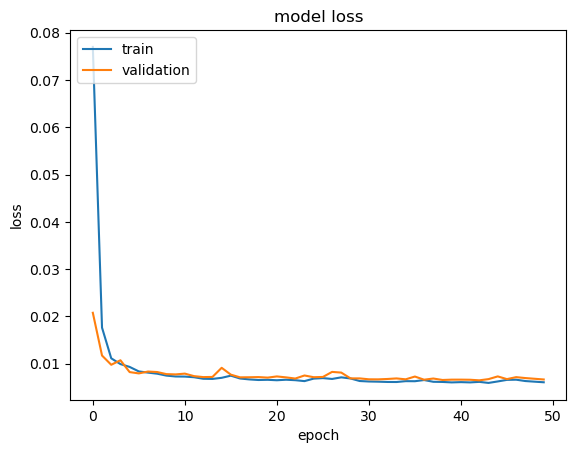

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [36]:
y_test_pred = model.predict(X_test)
mean_absolute_error(y_test, y_test_pred)

36/36 [==============================] - 0s 947us/step


0.006647159232217428

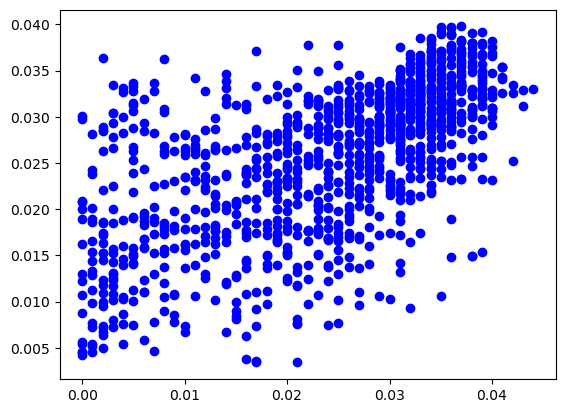

In [37]:
plt.plot(y_test, y_test_pred, 'bo')

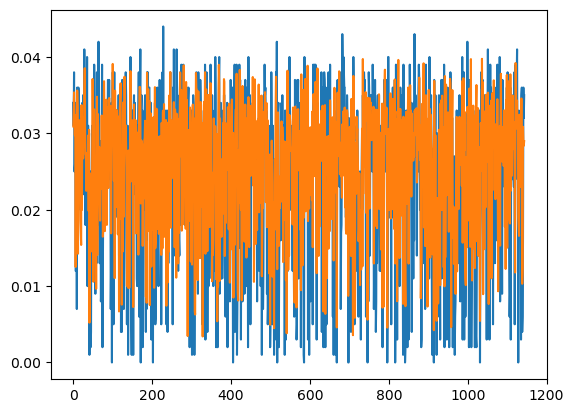

In [38]:
plt.plot(y_test)
plt.plot(y_test_pred)
plt.show()

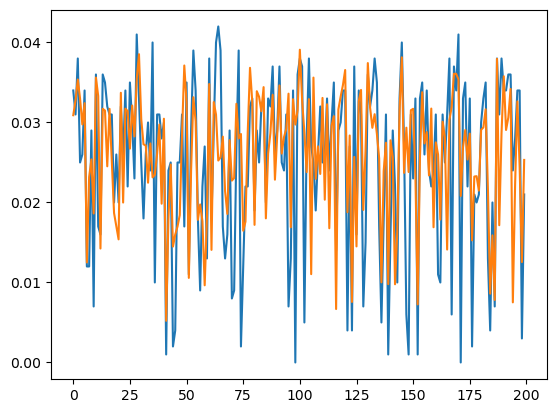

In [39]:
plt.plot(y_test[0:200])
plt.plot(y_test_pred[0:200])
plt.show()

### Regularization with drop-outs

In [40]:
model = models.Sequential([
  layers.Dense(512, activation='relu', input_shape=(n_feat,)),
  layers.Dropout(0.2),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='linear')
], name="Dropout")
model.summary()

Model: "Dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               103424    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 256)               6579

In [41]:
# Compile the model
model.compile(loss='mae', metrics=['mae', 'mse'], optimizer='adam')

In [42]:
history=model.fit(X_train, y_train, epochs=50, 
                  batch_size=1024, verbose=1, 
                  validation_split=0.2)

Epoch 1/50
4/4 [==============================] - 0s 49ms/step - loss: 0.2161 - mae: 0.2161 - mse: 0.0767 - val_loss: 0.0532 - val_mae: 0.0532 - val_mse: 0.0030
Epoch 2/50
4/4 [==============================] - 0s 29ms/step - loss: 0.0438 - mae: 0.0438 - mse: 0.0028 - val_loss: 0.0416 - val_mae: 0.0416 - val_mse: 0.0019
Epoch 3/50
4/4 [==============================] - 0s 28ms/step - loss: 0.0260 - mae: 0.0260 - mse: 0.0011 - val_loss: 0.0151 - val_mae: 0.0151 - val_mse: 3.0350e-04
Epoch 4/50
4/4 [==============================] - 0s 26ms/step - loss: 0.0194 - mae: 0.0194 - mse: 5.8020e-04 - val_loss: 0.0094 - val_mae: 0.0094 - val_mse: 1.5184e-04
Epoch 5/50
4/4 [==============================] - 0s 27ms/step - loss: 0.0147 - mae: 0.0147 - mse: 3.4473e-04 - val_loss: 0.0104 - val_mae: 0.0104 - val_mse: 1.4461e-04
Epoch 6/50
4/4 [==============================] - 0s 22ms/step - loss: 0.0124 - mae: 0.0124 - mse: 2.3055e-04 - val_loss: 0.0147 - val_mae: 0.0147 - val_mse: 2.8431e-04
Epoch 

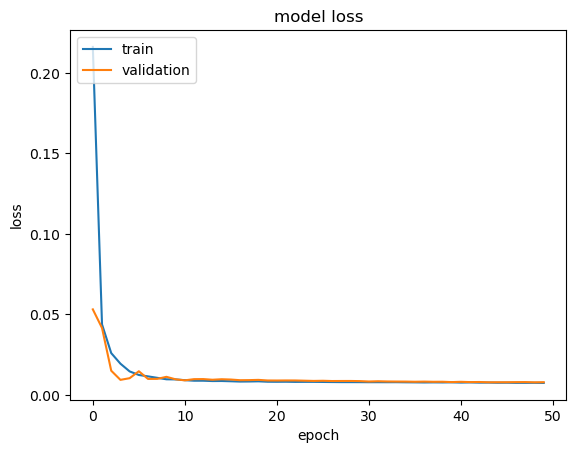

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [44]:
y_test_pred = model.predict(X_test)
mean_absolute_error(y_test, y_test_pred)

36/36 [==============================] - 0s 1ms/step


0.008123883765874678

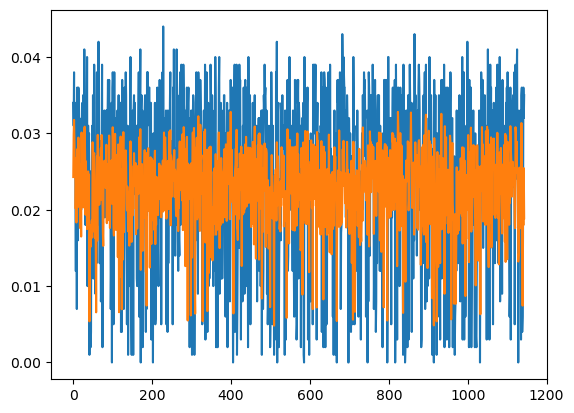

In [45]:
plt.plot(y_test)
plt.plot(y_test_pred)
plt.show()

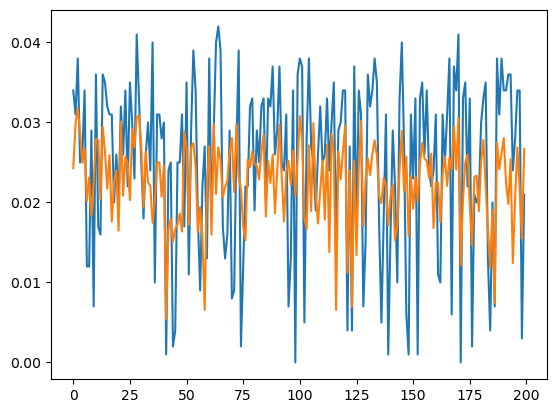

In [46]:
plt.plot(y_test[0:200])
plt.plot(y_test_pred[0:200])
plt.show()